### Lendo os dados

In [145]:
import pandas as pd

df_raw = pd.read_csv("https://raw.githubusercontent.com/FelipeMMMendes/Machine-Learning-Churn-Project/main/Data/train_churn.csv", delimiter=";")

### Verificação e tratamento da base de dados

In [146]:
df_raw.head()

,Unnamed: 0,genero,idoso,parceiro,dependentes,tempoDeServico,ServicoTelefone,MultiLinhas,ServicoInternet,ServicoSegurancaCyber,...,StreamingTV,StreamingFilmes,Contrato,BillingDigital,MetodoPagamento,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,Churn
0,6027,Masculino,0.0,Sim,Sim,35.0,Sim,Sim,Não,Sem serviço de internet,...,Sem serviço de internet,Sem serviço de internet,2 Anos,Não,Transferência Bancária (Automática),25.45,809.25,0.0,0.0,0.0
1,1961,Feminino,0.0,Não,Não,42.0,Sim,Sim,DSL,NaN,...,Não,Não,1 Ano,Sim,Transferência Bancária (Automática),60.15,2421.6,0.0,0.0,0.0
2,5308,Feminino,0.0,Não,Não,69.0,Sim,Não,DSL,Sim,...,Sim,Sim,2 Anos,Sim,Cartão de Crédito (Automático),82.45,5555.3,0.0,0.0,0.0
3,3587,Masculino,1.0,Não,Não,9.0,Sim,NaN,Fibra óptica,Não,...,Sim,Sim,Mensal,Sim,Cartão de Crédito (Automático),99.45,919.4,0.0,0.0,1.0
4,576,Masculino,0.0,Sim,Sim,31.0,Sim,Sim,Fibra óptica,Sim,...,Sim,Não,1 Ano,Não,Transferência Bancária (Automática),98.05,3082.1,NaN,0.0,0.0


In [147]:
#deletando coluna Unnamed: 0

#vamos agora diferenciar, o df_raw é o df cru, sem tratamento, é no df em que faremos a limpeza dos dados
df = df_raw

df.drop("Unnamed: 0",axis=1,inplace=True)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   genero                 4759 non-null   object 
 1   idoso                  4735 non-null   float64
 2   parceiro               4762 non-null   object 
 3   dependentes            4766 non-null   object 
 4   tempoDeServico         4747 non-null   float64
 5   ServicoTelefone        4789 non-null   object 
 6   MultiLinhas            4745 non-null   object 
 7   ServicoInternet        4771 non-null   object 
 8   ServicoSegurancaCyber  4778 non-null   object 
 9   ServicoBackup          4737 non-null   object 
 10  SeguroDispositivos     4750 non-null   object 
 11  ServicoSuporteTecnico  4767 non-null   object 
 12  StreamingTV            4751 non-null   object 
 13  StreamingFilmes        4775 non-null   object 
 14  Contrato               4738 non-null   object 
 15  Bill

In [149]:
#temos que fazer algumas normalizações dos dados, têm colunas que podem ser transformadas em números binários
#coluna genero
#Masculino vai passar a ser 1
#Feminino vai passar a ser 0
df['genero'] = df['genero'].map({'Masculino': 1, 'Feminino': 0})

In [150]:
#coluna parceiro
#Se tem parceiro (SIM) vai passar a ser 1
#Se não tem parceiro (NÃO) vai passar a ser 0
df['parceiro'] = df['parceiro'].map({'Sim': 1, 'Não': 0})

In [151]:
#coluna dependentes
#Se tem dependentes (SIM) vai passar a ser 1
#Se não tem dependentes (NÃO) vai passar a ser 0
df['dependentes'] = df['dependentes'].map({'Sim': 1, 'Não': 0})

In [152]:
#existem valores negativos na coluna de tempoDeServico, o que é estranho, pois qual o sentido de uma pessoa ter usado um serviço durante um tempo menor que 0?
quantNegativos = df.loc[df['tempoDeServico'] < 0]

#como o quantNegativos retorna um df, vamos usar o shape, que retorna linhas e colunas, como queremos so linhas (primeiro elemento), usamos o shape[0]
print(f"Numero de registros negativos antes: {quantNegativos.shape[0]}")

#vamos colocar o valor como 0, como se nunca tivessem usado o serviço, aqui usamos o .apply passando uma lambda function
df['tempoDeServico'] = df['tempoDeServico'].apply(lambda x: 0 if x < 0 else x)

quantNegativos = df.loc[df['tempoDeServico'] < 0]

print(f"Numero de registros depois: {quantNegativos.shape[0]}")

Numero de registros negativos antes: 103
Numero de registros depois: 0


In [153]:
#coluna ServicoTelefone
#Se tem servico de telefone (SIM) vai passar a ser 1
#Se não tem servico de telefone(NÃO) vai passar a ser 0
df['ServicoTelefone'] = df['ServicoTelefone'].map({'Sim': 1, 'Não': 0})

In [154]:
#coluna MultiLinhas
#Se tem mais de uma linha de servico de telefone (SIM) vai passar a ser 2
#Se não tem mais de uma linha de servico de telefone(NÃO) vai passar a ser 1
#Se não tem nenhum serviço de telefone vai passar a ser 0
df['MultiLinhas'] = df['MultiLinhas'].map({'Sim': 1, 'Não': 0, 'Sem serviço de telefone':-1})

In [155]:
#coluna ServicoInternet
#Se é DSL vai passar a ser 1
#Se é Fibra Óptica vai passar a ser 2
#Se não tem nenhum serviço de internet vai passar a ser 0
df['ServicoInternet'] = df['ServicoInternet'].map({'DSL': 1, 'Fibra óptica': 2, 'Sem serviço de internet': 0})

In [156]:
#coluna ServicoSegurancaCyber
#se tiver um serviço de segurança na internet (SIM) vai passar a ser 1
#se não tiver um serviço de segurança na internet (NÃO) vai passar a ser 0
#se não tem nenhum serviço de internet vai passar a ser -1
df['ServicoSegurancaCyber'] = df['ServicoSegurancaCyber'].map({'Sim': 1, 'Não': 0, 'Sem serviço de internet':-1})

In [157]:
#coluna ServicoBackup
#Se tem serviço de backup (SIM) vai ser 1
#Se não tem serviço de bakcup (NÃO) vai ser 0
#Se não tem serviço de internet vai ser -1
df['ServicoBackup'] = df['ServicoBackup'].map({'Sim': 1, 'Não': 0, 'Sem serviço de internet': -1})

In [158]:
#coluna SeguroDispositivos
#Se tem seguro para dispositivos (SIM) vai ser 1
#Se não tem seguro para dispositivos (NÃO) vai ser 0
#Se não tem serviço de internet vai ser -1
df['SeguroDispositivos'] = df['SeguroDispositivos'].map({'Sim': 1, 'Não': 0, 'Sem serviço de internet': -1})

In [159]:
#coluna ServicoSuporteTecnico
#Se tem serviço de suporte técnico (SIM) vai ser 1
#Se não tem serviço de suporte técnico (NÃO) vai ser 0
#Se não tem serviço de internet vai ser -1
df['ServicoSuporteTecnico'] = df['ServicoSuporteTecnico'].map({'Sim': 1, 'Não': 0, 'Sem serviço de internet': -1})

In [160]:
#coluna StreamingTV
#Se tem serviço de Streaming de canais de TV (SIM) vai ser 1
#Se não tem serviço de Streaming de canais de TV (NÃO) vai ser 0
#Se não tem serviço de internet vai ser -1
df['StreamingTV'] = df['StreamingTV'].map({'Sim': 1, 'Não': 0, 'Sem serviço de internet': -1})

In [161]:
#coluna StreamingFilmes
#Se tem serviço de Streaming de filmes (SIM) vai ser 1
#Se não tem serviço de Streaming de filmes (NÃO) vai ser 0
#Se não tem serviço de internet vai ser -1
df['StreamingFilmes'] = df['StreamingFilmes'].map({'Sim': 1, 'Não': 0, 'Sem serviço de internet': -1})

In [162]:
#coluna Contrato
#vamos mudar a escala para mês
#Mensal passa a ser 1
#1 Ano passa a ser 12
#2 anos passa a ser 24
df['Contrato'] = df['Contrato'].map({'Mensal': 1, '1 Ano': 12, '2 Anos': 24})

In [163]:
#coluna BillingDigital
#se o cliente recebe fatura digital (SIM) vai ser 1
#se o cliente não recebe a fatura digital (NÃO) vai ser 0
df['BillingDigital'] = df['BillingDigital'].map({'Sim': 1, 'Não': 0})

In [164]:
#coluna MetodoPagamento
#se for Cheque Eletrônico vai ser 0
#se for Cheque por Carta vai ser 1
#se for Transferência Bancária (Automática) vai ser 2
#se for Cartão de Crédito (Automático) vai ser 3
df['MetodoPagamento'] = df['MetodoPagamento'].map({'Cheque Eletrônico': 0, 'Cheque por Carta': 1, 'Transferência Bancária (Automática)': 2, 'Cartão de Crédito (Automático)': 3})

In [173]:
#coluna FaturaTotal
#essa coluna está armazenando os números como string, vamos passar ela para float
# Convertendo uma coluna de strings para float usando astype()
df['FaturaTotal'] = pd.to_numeric(df['FaturaTotal'], errors='coerce')

In [176]:
# Contar o número de valores nulos em cada coluna
num_valores_nulos_por_coluna = df.isnull().sum()

# Exibir o resultado
print(num_valores_nulos_por_coluna)


genero                    241
idoso                     265
parceiro                  238
dependentes               234
tempoDeServico            253
ServicoTelefone           211
MultiLinhas               255
ServicoInternet          1242
ServicoSegurancaCyber     222
ServicoBackup             263
SeguroDispositivos        250
ServicoSuporteTecnico     233
StreamingTV               249
StreamingFilmes           225
Contrato                  262
BillingDigital            238
MetodoPagamento           244
FaturaMensal              274
FaturaTotal               247
NumTickets                269
NumTicketsTecnico         255
Churn                     264
dtype: int64


In [174]:
df.describe()

,genero,idoso,parceiro,dependentes,tempoDeServico,ServicoTelefone,MultiLinhas,ServicoInternet,ServicoSegurancaCyber,ServicoBackup,...,StreamingTV,StreamingFilmes,Contrato,BillingDigital,MetodoPagamento,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,Churn
count,4759.00000,4735.000000,4762.000000,4766.000000,4747.000000,4789.000000,4745.000000,3758.000000,4778.000000,4737.000000,...,4751.000000,4775.000000,4738.000000,4762.000000,4756.000000,4726.000000,4753.000000,4731.000000,4745.000000,4736.000000
mean,0.50851,0.163464,0.487400,0.304029,33.243733,0.902067,0.319283,1.554284,0.081206,0.129829,...,0.169438,0.175916,8.772056,0.591978,1.321278,64.801947,2275.284252,0.503488,0.411170,0.263091
std,0.49998,0.369827,0.499894,0.460043,27.044067,0.297255,0.641997,0.497111,0.705030,0.733080,...,0.752903,0.755684,9.532782,0.491519,1.148225,35.930051,2248.815792,1.260113,1.230994,0.440358
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,1.000000,0.000000,0.000000,-127.000000,18.850000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,34.700000,385.550000,0.000000,0.000000,0.000000
50%,1.00000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,70.400000,1410.250000,0.000000,0.000000,0.000000
75%,1.00000,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,12.000000,1.000000,2.000000,90.400000,3778.200000,0.000000,0.000000,1.000000
max,1.00000,1.000000,1.000000,1.000000,190.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,24.000000,1.000000,3.000000,247.000000,8672.450000,5.000000,8.000000,1.000000


#### Análise do mapa de calor

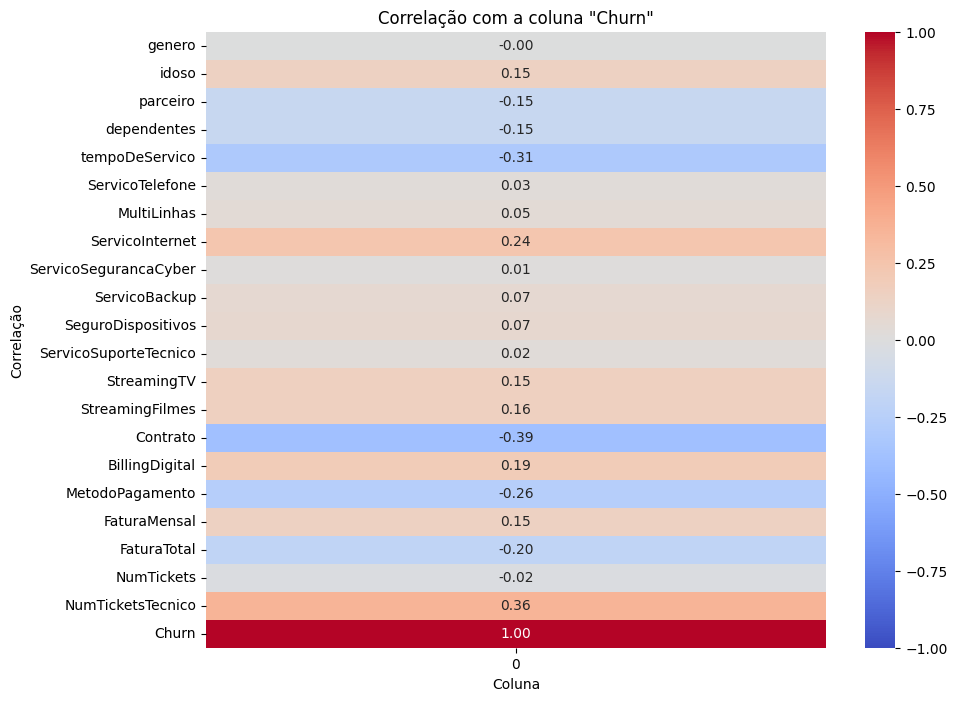

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular as correlações da coluna de interesse com todas as outras colunas
correlacoes_coluna_interesse = df.corrwith(df['Churn'])

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacoes_coluna_interesse.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlação com a coluna "Churn"')
plt.xlabel('Coluna')
plt.ylabel('Correlação')
plt.show()


### Separação dos Dados

In [167]:
#separação em variáveis alvo e auxiliares
Y = df['Churn']
X = df.drop('Churn',axis=1)

In [168]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

### Modelo CatBoostClassifier

In [169]:
#fazendo os imports necessarios
from catboost import CatBoostClassifier

model_catboost = CatBoostClassifier(iterations=1000, learning_rate=0.1)


### Modelo Rede Neural

### Modelo Árvore de Decisão

### Modelo Regressão Logística